In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
train = pd.read_csv('/kaggle/input/playground-series-s4e11/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e11/test.csv')
submission = pd.read_csv('/kaggle/input/playground-series-s4e11/sample_submission.csv')

train.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

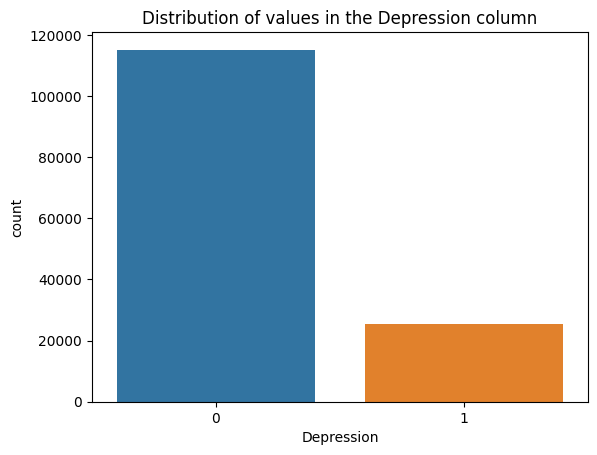

In [4]:
sns.countplot(x='Depression', data=train)
plt.title('Distribution of values ​​in the Depression column')
plt.show()

In [5]:
train['Pressure'] = train['Academic Pressure'].fillna(train['Work Pressure'])
train['Satisfaction'] = train['Study Satisfaction'].fillna(train['Job Satisfaction'])

mean_academic_pressure = train.loc[train['Working Professional or Student'] == 'Student', 'Academic Pressure'].mean()
mean_study_satisfaction = train.loc[train['Working Professional or Student'] == 'Student', 'Study Satisfaction'].mean()

mean_work_pressure = train.loc[train['Working Professional or Student'] == 'Working Professional', 'Work Pressure'].mean()
mean_job_satisfaction = train.loc[train['Working Professional or Student'] == 'Working Professional', 'Job Satisfaction'].mean()

def fill_pressure(row):
    if not pd.isnull(row['Pressure']):
        return row['Pressure']
    if row['Working Professional or Student'] == 'Student':
        return row['Academic Pressure'] if not pd.isnull(row['Academic Pressure']) else mean_academic_pressure
    else:
        return row['Work Pressure'] if not pd.isnull(row['Work Pressure']) else mean_work_pressure

def fill_satisfaction(row):
    if not pd.isnull(row['Satisfaction']):
        return row['Satisfaction']
    if row['Working Professional or Student'] == 'Student':
        return row['Study Satisfaction'] if not pd.isnull(row['Study Satisfaction']) else mean_study_satisfaction
    else:
        return row['Job Satisfaction'] if not pd.isnull(row['Job Satisfaction']) else mean_job_satisfaction

train['Pressure'] = train.apply(fill_pressure, axis=1)
train['Satisfaction'] = train.apply(fill_satisfaction, axis=1)

print(train[['Academic Pressure', 'Work Pressure', 'Pressure']].head())
print(train[['Study Satisfaction', 'Job Satisfaction', 'Satisfaction']].head())

train['CGPA'].fillna(0, inplace=True)
train['Financial Stress'].fillna(0, inplace=True)
train.drop(['Name', 'City', 'Profession', 'Academic Pressure', 'Work Pressure', 
            'Study Satisfaction', 'Job Satisfaction', 'Degree', 'Gender', 'Age', 
            'Work/Study Hours', 'Have you ever had suicidal thoughts ?', 
            'Sleep Duration', 'Working Professional or Student', 'Dietary Habits'], axis=1, inplace=True)

   Academic Pressure  Work Pressure  Pressure
0                NaN            5.0       5.0
1                NaN            4.0       4.0
2                5.0            NaN       5.0
3                NaN            5.0       5.0
4                NaN            1.0       1.0
   Study Satisfaction  Job Satisfaction  Satisfaction
0                 NaN               2.0           2.0
1                 NaN               3.0           3.0
2                 2.0               NaN           2.0
3                 NaN               1.0           1.0
4                 NaN               1.0           1.0


In [6]:
print(train.isnull().sum())
print(train.info())

id                                  0
CGPA                                0
Financial Stress                    0
Family History of Mental Illness    0
Depression                          0
Pressure                            0
Satisfaction                        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 7 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   id                                140700 non-null  int64  
 1   CGPA                              140700 non-null  float64
 2   Financial Stress                  140700 non-null  float64
 3   Family History of Mental Illness  140700 non-null  object 
 4   Depression                        140700 non-null  int64  
 5   Pressure                          140700 non-null  float64
 6   Satisfaction                      140700 non-null  float64
dtypes: float64(4), int64(2), objec